In [ ]:
import pandas as pd
import numpy  as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

1. На сайте https://www.kaggle.com/datasets выбрать набор данных каждому студенту индивидуально. Лучше всего выбирать датасеты в предметной области исходя из личных предпочтений. Не стоит выбирать слишком большие наборы данных (лучше не более 100 Мб).

In [ ]:
fake_news = pd.read_csv('FakeNewsNet.csv')
fake_news

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1
...,...,...,...,...,...
23191,Pippa Middleton wedding: In case you missed it...,https://www.express.co.uk/news/royal/807049/pi...,www.express.co.uk,52,1
23192,Zayn Malik & Gigi Hadid’s Shocking Split: Why ...,hollywoodlife.com/2018/03/13/zayn-malik-gigi-h...,hollywoodlife.com,7,0
23193,Jessica Chastain Recalls the Moment Her Mother...,http://www.justjared.com/2018/01/17/jessica-ch...,www.justjared.com,26,1
23194,"Tristan Thompson Feels ""Dumped"" After Khloé Ka...",www.intouchweekly.com/posts/tristan-thompson-f...,www.intouchweekly.com,24,0


2. В начале анализа следует привести общую характеристику набора данных: количество наблюдений, признаков, предметная область, содержание признаков, характер целевой переменной, задача обучения (регрессия, классификация, количество классов).

In [ ]:
print(fake_news[fake_news['source_domain'] == 'www.today.com'])

                                                   title  \
1      People's Choice Awards 2018: The best red carp...   
369    Serena Williams is pregnant, shares baby bump ...   
443    Zoe Saldana's $8 go-to for dry, chapped winter...   
537    Jessica Alba's breastfeeding selfie sums up wh...   
759    Billboard Latin Music Awards 2017: See the bes...   
...                                                  ...   
22726  Adam Levine reveals sex of baby No. 2 — and gi...   
22831  'Hollywood Medium' Tyler Henry reveals signs y...   
22832  'Glee' says goodbye to Finn without revealing ...   
23016  Bethenny Frankel mourns loss of beloved dog Co...   
23173  Mila Kunis and Ashton Kutcher walk 1st red car...   

                                                news_url  source_domain  \
1      https://www.today.com/style/see-people-s-choic...  www.today.com   
369    https://www.today.com/parents/serena-williams-...  www.today.com   
443    https://www.today.com/style/dry-lips-solution-.

Описание набора данных:
#################################

title - заголовок новости

news_url - ссылка на источник

source_domain - сайт которые осветил событие

tweet_num - количество твитов в соц. сети

real - является ли новость правдивой или нет (0 - нет, 1 - да) является целевой переменной в наборе данных. Указыавет на то, что сет подойдет для метода бинарной классификации
##################################

#3. Провести в Jupyter средствами pandas, sklearn, seaborn описательный анализ выбранного набора включающего (но не ограниченного) следующие шаги:


3.1. исследование шкалы измерения каждого существенного признака;

In [ ]:
print(f'Количество классов в датасете: {fake_news["real"].nunique()}\n')
print(f"Данные о количестве твитов новостей:\n{fake_news.describe()}")
print(f'\nКоличество признаков в датасете: {fake_news.shape[0]}')
print(f'\nКличество атрибутов в датасете: {fake_news.shape[1]}\n')
print(f'Типы данных в наборе:\n{fake_news.dtypes}')

Количество классов в датасете: 2

Данные о количестве твитов новостей:
          tweet_num          real
count  23196.000000  23196.000000
mean      88.956803      0.751897
std      488.694592      0.431921
min        0.000000      0.000000
25%       11.000000      1.000000
50%       37.000000      1.000000
75%       65.000000      1.000000
max    29060.000000      1.000000

Количество признаков в датасете: 23196

Кличество атрибутов в датасете: 5

Типы данных в наборе:
title            object
news_url         object
source_domain    object
tweet_num         int64
real              int64
dtype: object


3.2. построение эмпирического распределения каждого существенного признака;

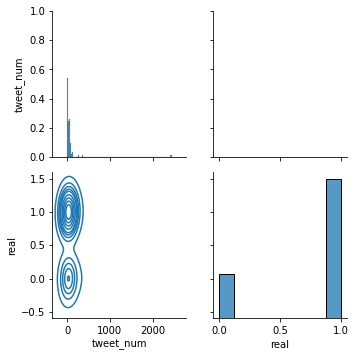

In [ ]:
columns = fake_news.columns
data_tmp = fake_news[columns][:100]
pg = sns.PairGrid(data_tmp)
pg.map_lower(sns.kdeplot)#под диагональю
pg.map_diag(sns.histplot)
#pg.map_upper(sns.scatterplot)
plt.show()

3.3. анализ количества и распределения отсутствующих значений;

In [ ]:
fake_news.shape

(23196, 5)

In [ ]:
print(fake_news.isna().sum())

title              0
news_url         330
source_domain    330
tweet_num          0
real               0
dtype: int64


3.4. построение совместного распределения каждого признака и целевой переменной;

In [ ]:
grouped_frame = pd.DataFrame(fake_news.groupby(['real']).count())
grouped_frame

,title,news_url,source_domain,tweet_num
real,,,,
0,5755,5495,5495,5755
1,17441,17371,17371,17441


3.5. построение корреляционной матрицы.

In [ ]:
fake_news.corr()

,tweet_num,real
tweet_num,1.000000,-0.051411
real,-0.051411,1.000000


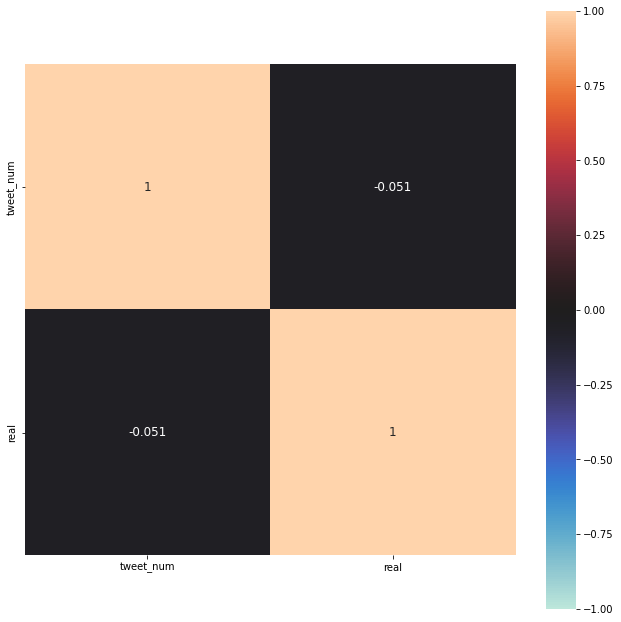

In [ ]:
ax = sns.heatmap(
    fake_news.corr(),
    annot=True,
    annot_kws={'size': 12},
    vmin=-1, vmax=1, center=0,
    square=True
)
ax.figure.set_size_inches(11, 11)

# 4. По каждому пункту анализа необходимо сделать содержательный вывод.

# 5. Провести подготовительную обработку данных, включающую следующие шаги:


In [ ]:
# удаление или заполнение отсутствующих значений;
col_names = fake_news.columns
for col_name in col_names:
  fake_news[col_name][fake_news[col_name].isnull()] = str(fake_news[col_name].mode()[0])

fake_news.head(6)

<ipython-input-47-28d6ad1f6421>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_news[col_name][fake_news[col_name].isnull()] = str(fake_news[col_name].mode()[0])


,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1
5,Gwen Stefani Got Dumped by Blake Shelton Over ...,www.intouchweekly.com/posts/gwen-stefani-dumpe...,www.intouchweekly.com,45,0


In [ ]:
# удаление несущественных либо избыточных признаков
fake_news = fake_news.drop('title', axis=1)
fake_news = fake_news.drop('news_url', axis=1)
fake_news.head(5)

,source_domain,tweet_num,real
0,toofab.com,42,1
1,www.today.com,0,1
2,www.etonline.com,63,1
3,www.dailymail.co.uk,20,1
4,www.zerchoo.com,38,1


In [ ]:
# приведение всех признаков к бинарной либо числовой шкале
source_name = fake_news['source_domain'].unique()

columns = {}
for pos, source in enumerate(source_name):
  columns[pos] = source

encoded_source = pd.get_dummies(fake_news['source_domain']).rename(columns=columns)
fake_news = fake_news.join(encoded_source).drop('source_domain', axis=1)
fake_news

,tweet_num,real,1001.com.do,100percentfedup.com,101kgb.iheart.com,1029now.iheart.com,1037theq.iheart.com,1043myfm.iheart.com,1061kissfm.iheart.com,1iota.com,...,youth-junction.com,youtu.be,youtube.com,z100.iheart.com,z100radio.iheart.com,z1035.com,z104fm.iheart.com,z951.com,zig.com,zimbabwe-today.com
0,42,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,63,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,38,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23191,52,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23192,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23193,26,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23194,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 6. Количественные характеристики датасета необходимо также привести после его обработки.

In [ ]:
fake_news.describe()

,tweet_num,real,1001.com.do,100percentfedup.com,101kgb.iheart.com,1029now.iheart.com,1037theq.iheart.com,1043myfm.iheart.com,1061kissfm.iheart.com,1iota.com,...,youth-junction.com,youtu.be,youtube.com,z100.iheart.com,z100radio.iheart.com,z1035.com,z104fm.iheart.com,z951.com,zig.com,zimbabwe-today.com
count,23196.000000,23196.000000,23196.000000,23196.000000,23196.000000,23196.000000,23196.000000,23196.000000,23196.000000,23196.000000,...,23196.000000,23196.000000,23196.000000,23196.000000,23196.000000,23196.000000,23196.000000,23196.000000,23196.000000,23196.000000
mean,88.956803,0.751897,0.000043,0.000043,0.000043,0.000043,0.000129,0.000259,0.000043,0.000043,...,0.000259,0.000086,0.000086,0.000043,0.000043,0.000086,0.000043,0.000043,0.000474,0.000043
std,488.694592,0.431921,0.006566,0.006566,0.006566,0.006566,0.011372,0.016081,0.006566,0.006566,...,0.016081,0.009285,0.009285,0.006566,0.006566,0.009285,0.006566,0.006566,0.021772,0.006566
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,65.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,29060.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Columns: 2443 entries, tweet_num to zimbabwe-today.com
dtypes: int64(2), uint8(2441)
memory usage: 54.4 MB


In [ ]:
fake_news.isnull().sum()

tweet_num              0
real                   0
1001.com.do            0
100percentfedup.com    0
101kgb.iheart.com      0
                      ..
z1035.com              0
z104fm.iheart.com      0
z951.com               0
zig.com                0
zimbabwe-today.com     0
Length: 2443, dtype: int64

In [ ]:
fake_news.dtypes

tweet_num              int64
real                   int64
1001.com.do            uint8
100percentfedup.com    uint8
101kgb.iheart.com      uint8
                       ...  
z1035.com              uint8
z104fm.iheart.com      uint8
z951.com               uint8
zig.com                uint8
zimbabwe-today.com     uint8
Length: 2443, dtype: object

In [ ]:
target = 'real'
y = fake_news[target]
X = fake_news.drop(target, axis=1)
X

,tweet_num,1001.com.do,100percentfedup.com,101kgb.iheart.com,1029now.iheart.com,1037theq.iheart.com,1043myfm.iheart.com,1061kissfm.iheart.com,1iota.com,234today.com,...,youth-junction.com,youtu.be,youtube.com,z100.iheart.com,z100radio.iheart.com,z1035.com,z104fm.iheart.com,z951.com,zig.com,zimbabwe-today.com
0,42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,63,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,38,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23191,52,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23192,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23193,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23194,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
